The following code works to to create the ML utils for the DS Club Datathon 2025 edition.

# 1. Libraries

In [1]:
# Import the utils created
from ml_utils import (
    run_grid_search,
    evaluate_overfitting_classification,
    evaluate_overfitting_regression,
    plot_confusion_matrix,
    plot_regression_predictions
)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# 2. Data loading

In [2]:
data = pd.read_csv('../data/titanic_dummy.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Model implementation

## 3.1. Classification example

In [4]:
# This is just to try the utils for a classification problem
vars = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[vars]
y = data['Survived']
X = pd.get_dummies(X, drop_first=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [5]:
# Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid={
        'n_estimators': [10, 50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }

# Call the grid search

best_model, best_params = run_grid_search(
    RandomForestClassifier(),
    param_grid,
    X_train,
    y_train,
    scoring='accuracy',
    cv=3
)

In [6]:
# Evaluate overfitting in classification
evaluate_overfitting_classification(best_model, X_train, y_train, X_test, y_test)

,Train,Test
Accuracy,0.896067,0.826816
Precision,0.898495,0.826446
Recall,0.896067,0.826816
F1-Score,0.894117,0.825310


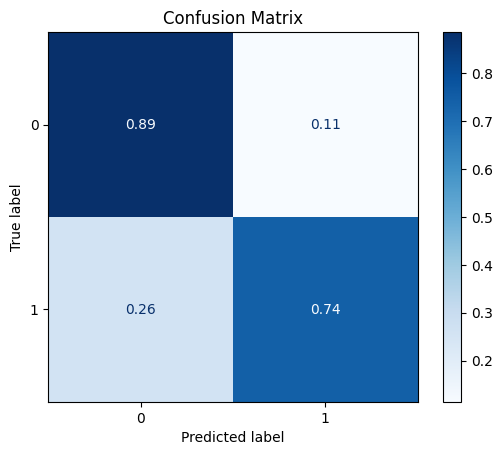

In [7]:
# Confusion matrix 
plot_confusion_matrix(best_model, X_test, y_test, labels=None, normalize='true')

## 3.2. Regression example

In [8]:
vars = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X = data[vars]
y = data['Fare'].astype('float')
X = pd.get_dummies(X, drop_first=True)
X.head()

,Pclass,Age,SibSp,Parch,Sex_male
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


In [9]:
# Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model, best_params = run_grid_search(RandomForestRegressor(), param_grid, X_train, y_train, scoring='r2', cv=5)

In [10]:
# Test the overfitting uitl
evaluate_overfitting_regression(best_model, X_train, y_train, X_test, y_test)

,Train,Test
MSE,633.961807,1012.621281
MAE,8.733003,13.505335
R2,0.764942,0.345611


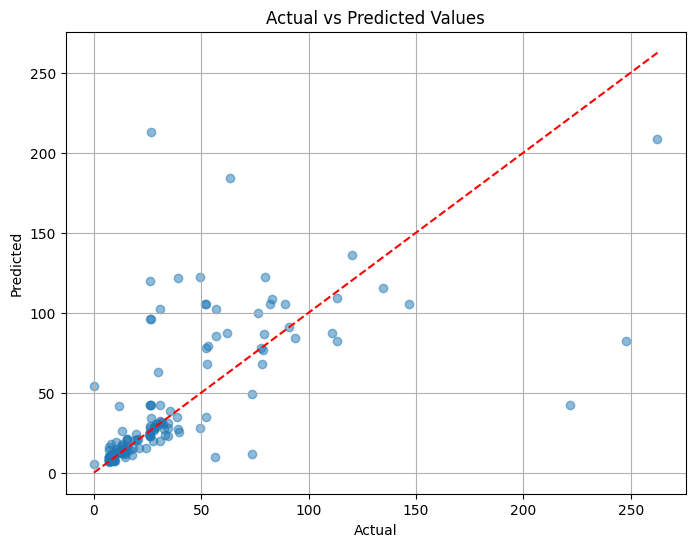

In [11]:
# Test the regression plot util
plot_regression_predictions(best_model, X_test, y_test)